In [2]:
from sys import path
path.append('./')
import utils
import pickle

from sklearn.neighbors import BallTree
import numpy as np
import matplotlib.pylab as plt
plt.style.use('/Users/pf494t/.matplotlib/stylelib/plf.mplstyle')

%matplotlib inline

Using TensorFlow backend.


In [3]:
model = utils.PredictionEncoder(
    labeled_twts='lab_twts_1million.csv',
    glove_path='../glove_pretrained/glove.twitter.27B.200d.txt',
    num_total_twts = int(1e6),
    glove_vec_size=200,
    top_n_words_to_process=100000,
    max_seq_length=50,
    batch_size=64,
    emb_size=200,
    lstm_units=128
)

In [4]:
model.read_data()

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [5]:
model.text_preprocessing()

In [7]:
model.load_embedding_matrix(pickle_file='model_objects/normed_embedding_mat.pickle')

In [8]:
model.build_lstm_binary_pred_graph()

In [8]:
model.train_model(
                  save_path='./model_objects/prediction_encoder_30k_epochs',
                  num_epochs=30000,
                  epoch_print_intvl=10000)

loss at epoch 0: 0.7722102403640747
loss at epoch 10000: 0.4514119029045105
loss at epoch 20000: 0.4192153215408325


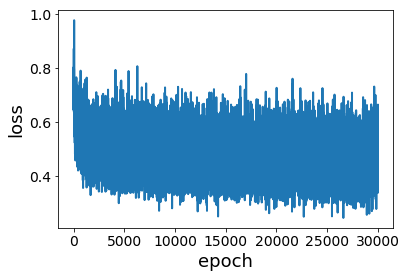

In [9]:
fig, ax = plt.subplots()

ax.plot(model.training_loss)
ax.set_ylabel('loss')
ax.set_xlabel('epoch')

plt.show()

In [9]:
model.forward_prop_test_set('./model_objects/prediction_encoder_30k_epochs.ckpt')

INFO:tensorflow:Restoring parameters from ./model_objects/prediction_encoder_30k_epochs.ckpt
Model restored.


In [ ]:
#model.test_set_embeddings

In [10]:
tree = BallTree(model.test_set_embeddings)

In [12]:
utils.query_most_similar_twts(model, tree, 10, 100000)

INITIAL TWEET
49908	0	some of my photos wont save! &amp; idk why 

MOST SIMILAR TWEETS (index, sentiment, tweet):
86310	0	i want my new iphone now! 
72849	0	2.12am and i'm still doing my work. must wake up on time tomorrow 
1124	0	twittermention I just got back too....I hit a skunk with my car 
37769	0	wants studio now! 
58003	0	twittermention OH MAN I WOULD BUT I'M FRESH OUT   
31572	0	dunno what 2 pack into my suitcase 
23972	1	I need a gossip girl fix right now 
65486	0	I need a job like now 
37106	0	twittermention Yes! I want to! I can't tonight though 


In [15]:
utils.query_most_similar_twts(model, tree, 10, 100000, 90098)

INITIAL TWEET
90098	0	but now he went to bed, and I won't talk to him till like Sunday, so I'm sad. 

MOST SIMILAR TWEETS (index, sentiment, tweet):
21359	0	twittermention E news said they getting dicvorced I'm sad 
2088	0	twittermention Truly going to miss you in Phoenix! So sad!!! 
46650	0	on the long ride home....so sad 
7543	0	darn it, transformers is sold out tonight, i might actually cry 
65678	0	Going to Sim it up tonight. Too sick to do anything else 
63638	0	twittermention That's what I thought. Makes me sad 
91454	0	Trying to hook up my old Super Nintendo, but it's not working! Sad. 
71651	0	Hate when weekends come to an end 
29177	0	That is so sad 


In [19]:
utils.query_most_similar_twts(model, tree, 10, 100000, 34497)

INITIAL TWEET
34497	0	Would rather not be going to work today 

MOST SIMILAR TWEETS (index, sentiment, tweet):
96972	0	twittermention it still doesnt work 
4366	0	I think it should be illegal to work. 
83167	0	twittermention not really...also going to the laundromattttttttttt. 
80358	0	chill'n at home! dont kno what im going to do today? 
13340	0	Why wont it load 
8780	0	Working at work 
718	1	still doesnt really understand what this is 
69300	0	Why would anyone golf?! Its too hard 
66071	0	I need to get busy. Too bad it's 11:30pm... 


In [12]:
len_embed = model.test_set_embeddings.shape[0]

In [40]:
r = np.random.randint(0,len_embed)
sim_score, sim_idxs = tree.query([model.test_set_embeddings[r]],k=10)

print('INITIAL TWEET\n{}\t{}\n'.format(r,model.df_test['normed_text'].iloc[sim_idxs[0][0]]))
print('MOST SIMILAR TWEETS:')
sim_idxs[0]
for i, sim_ix in enumerate(sim_idxs[0][1:]):
    #print(sim_ix)
    print('{}\t{}'.format(sim_ix, model.df_test['normed_text'].iloc[sim_ix]))

INITIAL TWEET
30251	twittermention winnnn I'm the first person that came here. No one here 

MOST SIMILAR TWEETS:
24716	Tears of a clown when there's no one around 
98304	Just saw someone that looked like Davie Dickson lmao 
59133	twittermention the ducks aren't there anymore. I think they've been abDUCKted 
18435	twittermention twittermention what's that? The sun? No sign here 
3406	the last titanic survivor died..  no more titanic survivors..... 
72024	the apprentice was sooooo good, sad it's over now 
13009	twittermention the oneself makes us both crazier, don't you think? 
96936	twittermention the tickets r only $10  and they're absolutely amazing ! 
34010	twittermention the person who I'm going with has seen it! 


In [16]:
sim_idxs[0]

array([33286, 41122, 98522, 11583, 97595, 12894, 40765, 94544,  2009,
       23220])

In [ ]:
test_set_embeddings = np.zeros([64 * 20000,100000])
with tf.Session() as sess:
  # Restore variables from disk.
    self.saver.restore(sess, ckpt_path)
    print("Model restored.")
    sess.run([self.test_init_op])
    for epoch in range(num_epochs):
        emb_temp = sess.run([self.enc_flat])[0]
        test_set_embeddings[epoch *
                   self.batch_size:(epoch+1)*self.batch_size] = emb_temp
    emb_temp = emb_temp[self.enc_flat.shape[0],:]
self.test_set_embeddings = test_set_embeddings[0:self.enc_flat.shape[0],:] #subset original shape otherwise will have repeated embeddings


In [36]:
sim_score, sim_idxs

(array([[ 0.        , 12.02980436, 12.58198554, 13.02275763, 13.02275763,
         13.06038048, 13.06128675, 13.16014137, 13.37007226, 13.52872438]]),
 array([[ 41938,  35581,  32584,  17041, 117041,  81049,  84218,  81442,
          88042,  11492]]))

In [44]:
model.df_test

,ItemID,Sentiment,SentimentSource,SentimentText,normed_text
93952,93965,0,Sentiment140,@BD_24 lol and I'm stuffed!!! Wish I hadn't ea...,twittermention lol and I'm stuffed!!! Wish I h...
957355,957371,0,Sentiment140,Indoors indoors. I guess I can't go outside th...,Indoors indoors. I guess I can't go outside th...
722799,722815,0,Sentiment140,Finally home. Training at 10 am in Waterbury t...,Finally home. Training at 10 am in Waterbury t...
48271,48284,1,Sentiment140,@alwayssmiling yeah~it is. really! Do you like...,twittermention yeah~it is. really! Do you like...
770250,770266,1,Sentiment140,http://twitpic.com/2ydkg - Time to bust out th...,URL - Time to bust out the Green Wing
446532,446545,1,Sentiment140,@texanoutofwater I found a better pen around t...,twittermention I found a better pen around the...
1549950,1549966,0,Sentiment140,"Time to go to work...ugh. Oh, and by the way....","Time to go to work...ugh. Oh, and by the way...."
871734,871750,1,Sentiment140,@JeffJimenezLulu just a stomach bug... spoke t...,twittermention just a stomach bug... spoke to ...
134087,134100,0,Sentiment140,"@CMNHTN He did, and I didn't care for it.","twittermention He did, and I didn't care for it."
68881,68894,0,Sentiment140,@anamolly I wish my day were like that...I'm h...,twittermention I wish my day were like that......


In [31]:
2000*64

128000

In [23]:
model.df_test.shape

(100000, 5)

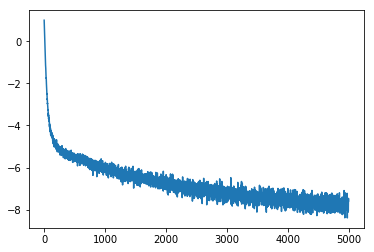

In [35]:
plt.plot(model.training_loss)

# Try graph
with smaller embedding layer and predicting sentiment

In [1]:
from sys import path
from sklearn.neighbors import BallTree
import numpy as np
path.append('./')

import utils

/Users/pf494t/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import tensorflow as tf

In [3]:
model = utils.Encoder(
    labeled_twts='../lab_twts_1million.csv',
    glove_path='../../glove_pretrained/glove.twitter.27B.200d.txt',
    num_total_twts = int(1e6),
    glove_vec_size=200,
    top_n_words_to_process=100000,
    max_seq_length=50,
    batch_size=64,
    emb_size=200,
    lstm_units=24
)

In [4]:
model.read_data()
model.text_preprocessing()
model.load_embedding_matrix(pickle_file='normed_embedding_mat.pickle')

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [5]:
model.build_lstm_binary_pred_graph()

In [6]:
model.forward_prop(ckpt_path='./pred_enc_model.ckpt')

INFO:tensorflow:Restoring parameters from ./pred_enc_model.ckpt
Model restored.


In [11]:
int(model.emb.shape[1])

50

In [5]:
model.training_labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [6]:
tf.reset_default_graph() # avoid errors if re-running the cell

# format numpy data for network
train_data = (model.training_seq,model.training_labels) 
#test_data = (test_features, test_labels)

# consume the numpy data in batches
train_dataset = tf.data.Dataset.from_tensor_slices(train_data).repeat().batch(model.batch_size)
#test_dataset = tf.data.Dataset.from_tensor_slices(test_data).repeat().batch(test_n)

# instantiate iterator with the correct shape and type
model.iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                           train_dataset.output_shapes)

# feed these objects into network
features, labels = model.iterator.get_next()

# initialize to desired datasets
model.train_init_op = model.iterator.make_initializer(train_dataset,name='training_iterator')
#test_init_op = iterator.make_initializer(test_dataset,name='testing_iterator')

In [10]:
# in development 
embeddings = tf.nn.embedding_lookup(model.normed_embedding_mat, features,name='batch_embeddings')
embeddings_d = tf.nn.dropout(embeddings,0.5,name='emb_dropout')

cell_fw_enc = tf.contrib.rnn.LSTMCell(model.lstm_units,name='lstm_enc_f')
cell_bw_enc = tf.contrib.rnn.LSTMCell(model.lstm_units,name='lstm_enc_b')

cell_fw_enc = tf.nn.rnn_cell.DropoutWrapper(cell_fw_enc, output_keep_prob=0.5, seed=42)
cell_bw_enc = tf.nn.rnn_cell.DropoutWrapper(cell_bw_enc, output_keep_prob=0.5, seed=42)

#lstm_cell = tf.nn.rnn_cell.DropoutWrapper(lstm_cell, output_keep_prob=0.5, seed=42)

(output_fw_enc, output_bw_enc), _ = tf.nn.bidirectional_dynamic_rnn(cell_fw_enc,
    cell_bw_enc, embeddings_d,
    dtype=tf.float32)

enc = tf.concat([output_fw_enc, output_bw_enc], axis=-1)
enc_flat = tf.contrib.layers.flatten(enc)

enc_2 = tf.layers.dense(enc_flat,50)
enc_2_d = tf.nn.dropout(enc_2,0.5,name='enc_dropout')

preds = tf.layers.dense(enc_2_d,2)

model.loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=labels,logits=preds)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
model.optimizer = tf.train.AdamOptimizer().minimize(model.loss)

model.saver = tf.train.Saver()

In [7]:
tree2 = BallTree(model.e_test_agg)
len_agg = model.e_test_agg.shape[0]

In [30]:
#126202

In [33]:
r = np.random.randint(0,len_agg)
sim_score, sim_idxs = tree2.query([model.e_test_agg[r]],k=10)

print('index {}\n'.format(r))
for i, sim_ix in enumerate(sim_idxs[0]):
    print(model.df_train['normed_text'].iloc[sim_ix])
    print()

index 34392

Going swimming again cuz my older sister wants to go. I wanted to finish harry potter  oh well.

twittermention lol... Love your BIO! crazy twitter lady lol... Just started following Looking forward to getting to know ya! 

Time to eat and then get packing my suitcase again to go to the airport to fly home to London. Good bye Canada 

so happy right now...  have a sister in law... 

I have to wear my friggin glasses today. 

twittermention same for me but no pain  Lache pas lol

Celebrating my girlfriend today ! 

twittermention im about to roll up and figure out my day just woke up had a long night burping 

is talking about Donny Evans... 

..another 'magic' moment for Lakers 



### the problem here is that `.forward_prop()` uses `.build_graph()`, which has a pre-set architecture
I want a function that will associate the associate key layers as attributes of the `model` object. Want to use the function to define the tensorflow graph.

Parameters: model_obj, 

In [18]:
def build_lstm_binary_pred_graph(self):
    tf.reset_default_graph()
    train_data = (self.training_seq,self.training_labels) 
    train_dataset = tf.data.Dataset.from_tensor_slices(train_data).repeat().batch(self.batch_size)
    self.iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)

    features, labels = self.iterator.get_next()
    self.train_init_op = self.iterator.make_initializer(train_dataset,name='training_iterator')

    embeddings = tf.nn.embedding_lookup(self.normed_embedding_mat, features,name='batch_embeddings')
    embeddings_d = tf.nn.dropout(embeddings,0.5,name='emb_dropout')

    cell_fw_enc = tf.contrib.rnn.LSTMCell(self.lstm_units,name='lstm_enc_f')
    cell_bw_enc = tf.contrib.rnn.LSTMCell(self.lstm_units,name='lstm_enc_b')

    cell_fw_enc = tf.nn.rnn_cell.DropoutWrapper(cell_fw_enc, output_keep_prob=0.5, seed=42)
    cell_bw_enc = tf.nn.rnn_cell.DropoutWrapper(cell_bw_enc, output_keep_prob=0.5, seed=42)

    (output_fw_enc, output_bw_enc), _ = tf.nn.bidirectional_dynamic_rnn(cell_fw_enc,
        cell_bw_enc, embeddings_d,
        dtype=tf.float32)

    enc = tf.concat([output_fw_enc, output_bw_enc], axis=-1)
    enc_flat = tf.contrib.layers.flatten(enc)

    enc_2 = tf.layers.dense(enc_flat,50)
    enc_2_d = tf.nn.dropout(enc_2,0.5,name='enc_dropout')

    preds = tf.layers.dense(enc_2_d,2)

    self.loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=labels,logits=preds)
    self.optimizer = tf.train.AdamOptimizer().minimize(self.loss)
    self.saver = tf.train.Saver()

In [27]:
64 * 2000

128000

In [19]:
#Doer.doSomething = doItBetter
model.build_graph = build_lstm_binary_pred_graph
#build_lstm_binary_pred_graph(model)

In [20]:
model.build_graph()

TypeError: build_lstm_binary_pred_graph() missing 1 required positional argument: 'self'

In [10]:
#./pred_enc_model.ckpt
model.forward_prop(ckpt_path='./pred_enc_model.ckpt')

TypeError: 'NoneType' object is not callable

In [ ]:
tree2 = BallTree(model.e_test_agg)
len_agg = model.e_test_agg.shape[0]

In [ ]:
r = np.random.randint(0,len_agg)
sim_score, sim_idxs = tree.query([model.e_test_agg[r]],k=10)

print('index {}\n'.format(r))
for i, sim_ix in enumerate(sim_idxs[0]):
    print(model.df_train['normed_text'].iloc[sim_ix])
    print()

In [19]:
#dir(model.iterator)

In [15]:
model.iterator.output_shapes

(TensorShape([Dimension(None), Dimension(50)]),
 TensorShape([Dimension(None), Dimension(2)]))

In [22]:
assert(1==2)

AssertionError: 

In [12]:
import pickle

In [13]:
with open('normed_embedding_mat.pickle','rb') as f:
    nor = pickle.load(f)

In [14]:
nor

array([[ 0.14549467, -0.06929245, -0.0653552 , ..., -0.34077665,
         0.05764554,  0.24998271],
       [ 0.14549467, -0.06929245, -0.0653552 , ..., -0.34077665,
         0.05764554,  0.24998271],
       [ 0.34960034,  1.7204726 ,  0.6154564 , ...,  1.8299967 ,
        -0.6424458 ,  0.13082089],
       ...,
       [ 0.14549467, -0.06929245, -0.0653552 , ..., -0.34077665,
         0.05764554,  0.24998271],
       [-0.5822497 ,  0.9691731 , -0.32950154, ..., -0.9492608 ,
        -0.14419806, -1.7650244 ],
       [-0.31884897,  3.2818923 , -1.6453004 , ...,  0.43799567,
         1.3184774 ,  0.21169867]], dtype=float32)

In [8]:
normed_embedding_mat.pickle

normed_embedding_mat.pickle


In [10]:
model.normed_embedding_mat

In [7]:
model.train_model()

NameError: name 'train_init_op' is not defined

In [5]:
ls ../lab_twts_1million.csv

../lab_twts_1million.csv*


In [6]:
ls ../../glove_pretrained/

glove.6B.100d.txt           glove.6B.50d.txt
glove.6B.200d.txt           glove.twitter.27B.200d.txt
glove.6B.300d.txt


In [7]:
#model.text_preprocessing()

In [22]:
class tester:
    def __init__(self,a=4,b=6):
        self.a = a
        self.b = b
        
    def add_c(self,c):
        self.c = c
    
    def try_it(self,d=99):
        self.d = d

In [23]:
t = tester()

In [24]:
t.try_it(d=55)

In [34]:
t.d

55

In [10]:
t.add_c(7)

In [14]:
t.c

7

In [20]:
model.new_thing = 5

In [85]:
class Modeling:
    def __init__(self,attr1):
        self.attr1 = attr3
    def train_model(self):
        print('training model',self.attr1)
    def save_model(self):
        print('saving model')
        

In [ ]:
class Algorithm(Modeling):
    def __init__(self, attr1, attr2, new_preprocessing):
        self.attr1 = attr1
        self.attr2 = attr2
        self.new_preprocessing = new_preprocessing
        
    def new_step(self):
        print(self.new_preprocessing,self.attr1,self.attr2)        

In [82]:
class Algorithm(Modeling):
    def __init__(self, attr1, attr2, new_preprocessing):
        
        self.attr1 = attr1
        self.attr2 = attr2
        self.new_preprocessing = new_preprocessing
        
    def new_step(self):
        print(self.new_preprocessing,self.attr1,self.attr2)
        

In [83]:
m1 = Algorithm(50,100,'normalize')

In [84]:
m1.train_model()

training model 50


In [105]:
class Animal:
    def __init__(self, legs, size, noise):
        self.legs = legs
        self.size = size
        self.noise = noise
    
    def legs_squared(self):
        return self.legs ** 2


In [ ]:
class Params:
    def __init__(self, attr1)

In [106]:
class Bird(Animal):
    def __init__(self, legs, size, noise, fly):
        Animal.__init__(self, legs, size, noise)
        self.fly = fly

In [107]:
penguin = Bird(2, 'small', 'chirp', True)
#penguin = Bird(False)

In [108]:
penguin.legs_squared()

4

In [ ]:
def __init__(self, first, last, staffnum):
    super().__init__(first, last)
    self.staffnumber = staffnum

In [109]:
class Parameters():
        
    def __init__(self, glove_vec_size, top_n_words_to_process, glove_path, labeled_twts, num_total_twts,
                 max_seq_length, batch_size, lstm_units, emb_size):
        self.glove_vec_size = glove_vec_size
        self.top_n_words_to_process = top_n_words_to_process
        self.glove_path = glove_path
        self.labeled_twts = labeled_twts
        self.num_total_twts = num_total_twts
        self.max_seq_length = max_seq_length
        self.batch_size = batch_size
        self.lstm_units = lstm_units
        self.emb_size = emb_size

In [110]:
params = Parameters(    
    labeled_twts='../lab_twts_1million.csv',
    glove_path='../../glove_pretrained/glove.twitter.27B.200d.txt',
    num_total_twts = int(1e6),
    glove_vec_size=200,
    top_n_words_to_process=100000,
    max_seq_length=50,
    batch_size=64,
    emb_size=200,
    lstm_units=24)

In [112]:
params.labeled_twts

'../lab_twts_1million.csv'